<a href="https://colab.research.google.com/github/AmoolyaS/Machine_Learning_mini_projects/blob/main/IRIS_classifier_model_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df["Target"]=iris.target
df["flower_name"]=df.Target.apply(lambda x : iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
df.groupby(by="Target").value_counts

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
Target,,,,
0,250.3,171.4,73.1,12.3
1,296.8,138.5,213.0,66.3
2,329.4,148.7,277.6,101.3


In [ ]:
df0=df[df["Target"]==0]
df1=df[df["Target"]==1]
df2=df[df["Target"]==3]

In [ ]:
import matplotlib.pyplot as plt

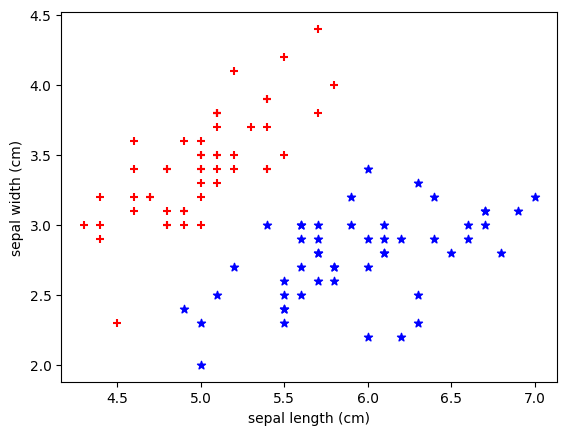

In [ ]:
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.scatter(df0["sepal length (cm)"],df0["sepal width (cm)"],marker="+",color="red")
plt.scatter(df1["sepal length (cm)"],df1["sepal width (cm)"],marker="*",color="blue")
#plt.scatter(df2["sepal length (cm)"],df2["sepal width (cm)"],marker=".",color="green")

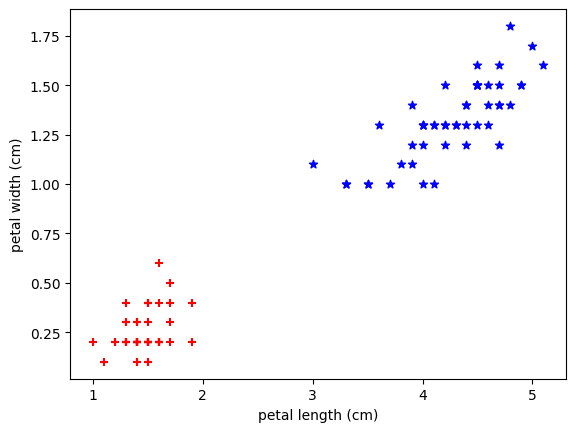

In [ ]:
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.scatter(df0["petal length (cm)"],df0["petal width (cm)"],marker="+",color="red")
plt.scatter(df1["petal length (cm)"],df1["petal width (cm)"],marker="*",color="blue")
#plt.scatter(df2["petal length (cm)"],df2["petal width (cm)"],marker=".",color="green")

In [ ]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target               0
flower_name          0
dtype: int64

In [ ]:
X=df.drop(columns=["Target","flower_name"])
y=df[["Target"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.svm import SVC
model=SVC()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [ ]:
model.score(X_test,y_test)

0.9666666666666667